# Importing the required libraries & packages

In [1]:
# To allow the output of all the commands entered in a cell to appear inside the same output cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [4]:
from sklearn import metrics

# Multiple Linear Regression Problem


| NAME | AGE | GENDER|
|:- |:-: |:- |
| Timothy   | 20   | Male    |
| Elise     | 20   | Female  |
| Soirchsa  | 20   | Female  |

**Zirconium Consortium Inc.,** is a manufacturer of speciality gem stones that are alternatives to diamonds used as jewellery.<br>
Apply the **Multiple Linear Regression** algorithm and help the ZC Inc to **predict the price** of the stone/s+ on the basis of the various feature information given in the dataset. <br>
**Dataset:<font color= blue> cubic_zirconia.csv**</font>

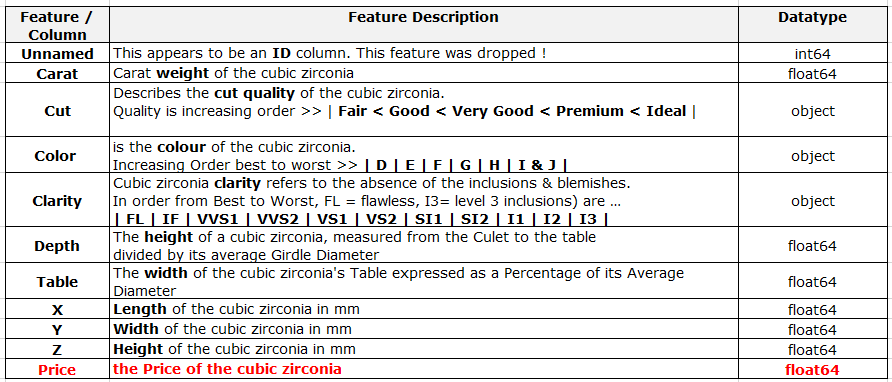

<center><h3>Cubic  ZIRCONIA : </h3></center><br>
<center>Cubic Zirconia (CZ) used for jewelry is a synthetic material !</center>

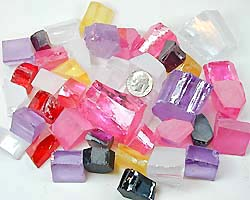

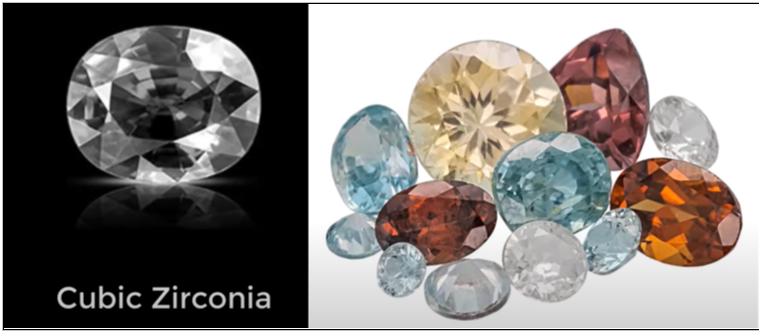

<font color = green> **Note to the evaluator :**<br>
Synopsis of the dataframes (variable names) used in the Linear Regression problem :
1. **czo :** created at the time of importing the csv file
2. **cz1 :**  created after dropping the column **Unnamed:** 0 under section **Three Quick Observations** below
3. **cz1_encoded :** created at the time of performing the Label encoding
4. **cz1_prepared :** created after the Data Preparation phase & just before performing the Train-Test Split </font>  

## Import the data

In [5]:
czo = pd.read_csv('cubic_zirconia.csv')  # Import the data
czo.shape

(26967, 11)

In [6]:
# Check if column names have been imported correctly !!
czo # viewing the the first 5 & last 5 rows of the dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [7]:
print(czo.dtypes)

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object


**The Import was successful**
 - the count of the columns is the same as seen in the .csv file 
 - the columns names are showing correctly
 - the data-type assigned by pandas to the cloumns is consistent the kid of data seen under the same

In [8]:
czo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


## Three Quick Observations

**We also notice the following:**<br>
- the target variable **Price** is a continuous random variable & has been assigned the data-type **int64**
 - we prefer to change it to data-type **float4**<br>
- the first column **Unnamed: 0** of primary key / ID type<br> 
 - we will drop this feature as it does not contribute value to the model’s learning  <br>
 - we will check for duplicate rows before & after dropping this feature
- the columns names viz **x , y & z** are generic<br>
 - we will change these to convey the proper meanings of the cubic zirconia that they actually represent viz., **Length, Width & Height**

### i. Drop the ID column

**Check for duplicates BEFORE dropping the column - _Unnamed: 0_**

In [9]:
czo.duplicated().sum()
czo[czo.duplicated()]

np.int64(0)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price


**Drop the Column Unnmaed 0:**

In [10]:
cz1 = czo.drop(axis= 1, columns= 'Unnamed: 0')  # Commented after first execution
cz1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


**Check for duplicates AFTER dropping the column - _Unnamed: 0_**

In [11]:
cz1.duplicated().sum()
cz1[cz1.duplicated()].shape

np.int64(34)

(34, 10)

**There are 34 duplicate records .. ie., a lot less than even 1%. <br>
<font color= blue> We will drop these later in the data-cleaning phase below !</font>**

### ii. Re-name the columns x, y & z

In [12]:
cz1.rename(columns= {"x": "length", 
                    "y": "width", 
                    "z": "height"},
                    inplace= True)

In [13]:
cz1.head(2)

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984


### ii. Change the data-type of the target variable <font color= blue> Price </font> to float64

In [14]:
print(cz1.price.dtypes)  # BEFORE type-casting

int64


In [15]:
cz1['price'] = cz1['price'].astype('float64')

In [16]:
print(cz1.price.dtypes)  # AFTEER type-casting

float64


In [17]:
cz1

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408.0
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114.0
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656.0
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682.0


In [18]:
cz1.shape

(26967, 10)

### Summary

**We have acted on the 3 Observations - as follows:**<br>
- dropped the first column **Unnamed: 0** of primary key / ID type<br> 
- changed the data-type of the target variable **Price** to **float64**<br>
- changed the names of the 3 columns to **Length, Width & Height**<br>

**<font color = blue>The dataset cz1 now has 26967 rows × 10 columns</font>**

**We will now look at the Meta-data & proceed to the Data Cleansing Phase of the EDA activity**

## EDA: Data Cleansing

i. Check for Missing Values<br>
ii. Check for Presence of Zeros in the columns having Categorical Data<br>
iii. Check for presence of special characters | repeating Values<br>
iv. Check for Anamolies<br>
v. Check for Duplicate rows<br>
vi. Check for Outliers

#### Look-up the Metadata

In [19]:
cz1.shape  # Check number of rows & columns

(26967, 10)

In [20]:
cz1.info() # Check the metada of the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   length   26967 non-null  float64
 7   width    26967 non-null  float64
 8   height   26967 non-null  float64
 9   price    26967 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.1+ MB


In [21]:
cz1.head()

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


#### i. Check for Missing Values & Treat them

In [22]:
# get a list of all columns with missng values together with their datatypes !!
cz1[cz1.isnull().sum()[cz1.isnull().sum()>0].index].dtypes

depth    float64
dtype: object

In [23]:
# get the count of MISSING VALUES - re-confirm the above
cz1.isnull().sum().sum()
cz1.isnull().sum()

np.int64(697)

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
length       0
width        0
height       0
price        0
dtype: int64

**There are 697 ie., (about 2. %) in the column 'depth' missing values in the feature -- <font color = blue>Depth</font>**<br>
Before we decide to drop these rows, let's check if we can do any imputation. Since we have 3 categorical columns, we can check if these missing values all belong to any one type of category combination. If, so we can impute using the appropriate category-combinations.

**Let us make a dataframe of the rows where depth = NaN & call it <font color = blue> missing_cz1</font>**

In [24]:
missing_cz1 = cz1[cz1.depth.isnull()] # create a seperate dataframe of the missing values !
missing_cz1.shape
missing_cz1

(697, 10)

,carat,cut,color,clarity,depth,table,length,width,height,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803.0
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501.0
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292.0
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177.0
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340.0
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673.0
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321.0
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343.0
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882.0


In [25]:
# column: cut | value counts of each SubCategory in the df "missing_cz1"
missing_cz1.cut.value_counts()   

cut
Ideal        270
Premium      192
Very Good    152
Good          59
Fair          24
Name: count, dtype: int64

In [26]:
# column: color | value counts of each SubCategory in the df "missing_cz1"
missing_cz1.color.value_counts() 

color
G    132
E    124
F    117
H    111
I     95
D     76
J     42
Name: count, dtype: int64

In [27]:
# column: clarity |value counts of each SubCategory in the df "missing_cz1"
missing_cz1.clarity.value_counts() 

clarity
VS2     174
SI1     163
SI2     128
VS1     102
VVS2     52
VVS1     48
IF       20
I1       10
Name: count, dtype: int64

**We see that the rows containing missing values for depth are spread over most the the sub categories among Cut, Color, Clarity. We DO not see any one or two sub-cateogry combinations having the missig values for depth.<br>
<font color = blue> So, it is a good idea to drop these 697 rows</font>**<br>

**Drop the rows with Missing values**

In [28]:
cz1.dropna(inplace= True)
cz1.shape
cz1

(26270, 10)

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408.0
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114.0
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656.0
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682.0


In [29]:
# Verify the removal of the rows with missing values !
cz1.isnull().sum().sum()

np.int64(0)

#### ii. Check for Presence of Zeros in the columns having Numeric Data

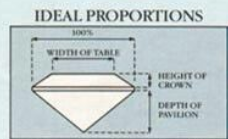

**A note on the understanding of the 6(six)numeric features - as we check for the presence of ZEROes**<br>
<font color = 'brown'>_this is based on the information provided in the data dictionary & general information from the website :</font>_<br>https://www.cubiczirconia.com/blogs/about-cubic-zirconia/7796977-cubic-zirconia-size-chart-by-carat-weight<br>

**| Feature |** Carat | refers to the **weight** of the cubic zirconia | it cannot be ZERO<br>
**| Features |** Table, Length, Width & Depth | refer to the relative **proportions** of key dimensions|  cannot be = ZERO |<br>
**| Feature |** Price | cannot be zero unless the other 4 dimensions are all ZERO| <br>

In [30]:
cols = ['carat', 'depth', 'table', 'length', 'width', 'height', 'price']

In [31]:
# Spotting the Zeroes in the numeric columns 
zeros = cz1[(cz1.carat == 0) |
        (cz1.depth == 0) | 
        (cz1.table == 0) | 
        (cz1.length == 0) | 
        (cz1.width == 0) | 
        (cz1.height == 0) | 
        (cz1.price == 0)]

In [32]:
# Spotting the Zeroes in the numeric columns 
print("Report of ZEROEs in the dataframe ")
zeros

Report of ZEROEs in the dataframe 


,carat,cut,color,clarity,depth,table,length,width,height,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130.0
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207.0
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130.0
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265.0
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631.0
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696.0
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381.0
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167.0
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383.0


**the count of zeros in the dataset = 9 out of 26,270 = 0.04% of rows (approx)**
- since it is a very small number, we can straight-away choose to drop these rows.<br>
- before dropping, however,we will check the value_counts in the sub-categories of other features<br>
- let's review the report of value_counts (see below)

**Report of Value Counts of the ZEROES**

In [33]:
# column: cut | value counts of each SubCategory in the df "missing_cz1"
zeros.cut.value_counts()   

cut
Premium    6
Good       2
Fair       1
Name: count, dtype: int64

In [34]:
# column: color | value counts of each SubCategory in the df "missing_cz1"
zeros.color.value_counts() 

color
H    4
G    3
F    2
Name: count, dtype: int64

In [35]:
# column: clarity | value counts of each SubCategory in the df "missing_cz1"
zeros.clarity.value_counts() 

clarity
SI2    4
I1     2
VS2    1
SI1    1
VS1    1
Name: count, dtype: int64

**From the review of the <font color= blue>report of zeros</font> vis-a-vis the <font color= blue> report of value_counts </font> - we see that we are not going to loose any valuable information in the columns having categorical data viz., Cut, Color & Clarity.<br>
<font color = blue> So, we can decide to drop these 9 rows with ZEROS</font>**

In [36]:
# ReturnsS the index of all the rows that meet the condition
cz1[cz1['height'] == 0.00].index 

Index([5821, 6034, 6215, 10827, 12498, 12689, 17506, 18194, 23758], dtype='int64')

In [37]:
# drop the rows using the indexes obained above
cz1.drop(cz1[cz1['height'] == 0].index, inplace = True) 

In [38]:
# Verify the removal of the rows with Zero Values ...
(cz1['height'] == 0).sum()
cz1[cz1['height'] == 0]

np.int64(0)

,carat,cut,color,clarity,depth,table,length,width,height,price


In [39]:
cz1.shape

(26261, 10)

#### iii. Check for the presence of special characters | repeating Values
 - in features having Categorical data & 
 - in features having Numeric data

In [40]:
# Check for the presence of special characters | repeating Values - features having Numeric data
num_cols = cz1.select_dtypes(exclude = 'object').columns
num_cols

Index(['carat', 'depth', 'table', 'length', 'width', 'height', 'price'], dtype='object')

In [41]:
# Check for the presence of special characters | repeating Values - features having Numeric data
for each_col in num_cols:
    print("Feature: ", each_col)
    print("Count of Unique values:", cz1[each_col].nunique())
    cz1[each_col].unique()

Feature:  carat
Count of Unique values: 256


array([0.3 , 0.33, 0.9 , 0.42, 0.31, 1.02, 1.01, 0.5 , 1.21, 0.35, 0.32,
       1.1 , 0.71, 1.5 , 0.34, 0.54, 1.04, 0.4 , 1.52, 1.19, 0.66, 0.52,
       0.72, 0.77, 0.51, 1.26, 1.55, 1.58, 0.43, 2.  , 0.73, 1.14, 0.78,
       0.91, 0.27, 1.8 , 1.13, 0.38, 0.57, 0.44, 0.7 , 1.22, 0.59, 1.2 ,
       2.16, 1.68, 0.76, 0.41, 1.51, 1.69, 1.3 , 1.  , 0.28, 0.55, 1.39,
       0.36, 0.23, 1.37, 0.81, 2.02, 2.8 , 1.56, 2.2 , 0.75, 1.71, 0.92,
       1.45, 1.16, 0.58, 0.97, 1.03, 0.26, 1.53, 1.63, 0.96, 1.24, 0.39,
       0.61, 0.24, 2.01, 1.7 , 0.79, 0.67, 1.28, 0.25, 0.56, 1.09, 2.11,
       1.17, 0.82, 0.53, 0.46, 2.43, 1.65, 0.84, 1.74, 1.11, 0.8 , 1.83,
       1.25, 1.15, 0.6 , 1.06, 1.05, 1.18, 2.27, 2.36, 1.07, 0.95, 0.93,
       2.48, 1.23, 2.03, 1.27, 0.83, 1.43, 0.45, 1.12, 1.59, 0.62, 1.61,
       0.74, 2.04, 1.33, 0.29, 0.37, 1.35, 1.6 , 3.04, 1.57, 2.14, 0.49,
       1.49, 1.76, 2.1 , 1.78, 1.34, 1.38, 2.33, 2.51, 2.05, 0.87, 1.79,
       1.73, 0.69, 1.32, 1.86, 2.61, 1.66, 0.63, 2.

Feature:  depth
Count of Unique values: 169


array([62.1, 60.8, 62.2, 61.6, 60.4, 61.5, 63.7, 63.8, 60.5, 60.7, 61.1,
       66.2, 61.2, 59.8, 61.9, 60. , 62.9, 62.7, 61.7, 62.4, 61.4, 64. ,
       62.3, 63. , 59.9, 62.8, 61.3, 62. , 61. , 63.9, 62.6, 62.5, 61.8,
       58. , 64.9, 60.9, 59.7, 63.2, 58.4, 59.4, 63.5, 63.1, 66.8, 65.2,
       60.6, 64.3, 60.2, 60.3, 65.5, 58.5, 68.3, 66.5, 63.3, 58.8, 63.6,
       63.4, 57.5, 59. , 58.7, 59.1, 64.1, 64.5, 64.4, 60.1, 57.6, 70.6,
       59.2, 59.3, 50.8, 58.9, 65.4, 58.6, 59.5, 56.7, 67. , 66. , 54.6,
       59.6, 64.7, 66.9, 64.6, 64.8, 58.2, 57.9, 56.9, 66.4, 65. , 66.6,
       57.4, 64.2, 58.1, 67.7, 55.2, 66.3, 65.3, 67.9, 67.6, 65.8, 67.1,
       65.1, 67.5, 56.6, 55.9, 57.3, 57.1, 57.8, 58.3, 65.7, 57.2, 52.7,
       56.1, 66.1, 56.3, 66.7, 54.7, 71.3, 67.3, 65.9, 71. , 57.7, 53.4,
       65.6, 56. , 68.9, 68.8, 55.3, 69.2, 53.1, 69.8, 56.5, 56.2, 55.1,
       55.5, 53.2, 56.8, 68.4, 67.8, 55.6, 67.2, 57. , 69. , 55.8, 52.2,
       53.8, 68.6, 68. , 68.7, 68.5, 70.2, 56.4, 68

Feature:  table
Count of Unique values: 112


array([58. , 60. , 56. , 59. , 62. , 64. , 57. , 55. , 58.2, 53. , 61. ,
       54. , 55.7, 63. , 60.3, 65. , 54.7, 54.2, 66. , 62.2, 57.8, 60.4,
       53.8, 55.4, 54.3, 51. , 67. , 55.8, 55.1, 54.8, 56.7, 56.9, 53.4,
       60.1, 68. , 55.5, 55.2, 56.5, 56.1, 58.9, 62.3, 70. , 57.6, 60.2,
       53.6, 53.1, 58.5, 55.9, 56.2, 52. , 59.4, 54.5, 55.6, 58.4, 56.4,
       57.4, 57.2, 54.4, 53.7, 54.1, 54.9, 58.7, 53.2, 79. , 59.3, 53.3,
       53.9, 60.7, 76. , 59.9, 59.6, 58.3, 55.3, 61.6, 60.5, 57.7, 58.1,
       57.1, 60.8, 69. , 64.2, 50. , 61.5, 56.6, 58.6, 60.9, 56.8, 57.5,
       54.6, 62.8, 51.6, 56.3, 60.6, 57.9, 59.1, 62.5, 53.5, 59.8, 59.7,
       50.1, 61.8, 63.3, 58.8, 59.2, 57.3, 61.4, 62.6, 49. , 61.9, 64.3,
       62.1, 61.2])

Feature:  length
Count of Unique values: 529


array([ 4.27,  4.42,  6.04,  4.82,  4.35,  6.46,  6.35,  5.09,  6.72,
        4.52,  4.4 ,  6.74,  5.08,  5.74,  7.12,  4.37,  4.56,  6.52,
        6.  ,  5.42,  6.54,  4.72,  7.35,  6.8 ,  5.53,  7.4 ,  5.18,
        4.38,  5.65,  6.76,  5.7 ,  4.3 ,  5.95,  4.61,  6.82,  5.16,
        6.9 ,  7.42,  6.05,  4.88,  4.32,  8.01,  6.42,  4.85,  5.21,
        5.75,  6.71,  5.83,  6.14,  5.12,  6.88,  4.89,  6.44,  5.13,
        4.22,  7.81,  4.28,  6.79,  4.64,  5.36,  4.25,  5.23,  4.9 ,
        5.91,  5.39,  5.37,  5.11,  8.29,  4.39,  7.6 ,  6.08,  4.81,
        5.85,  6.86,  4.75,  4.34,  5.06,  5.24,  4.77,  7.3 ,  5.07,
        4.47,  6.24,  5.71,  5.15,  5.02,  6.25,  5.57,  7.59,  7.01,
        6.93,  6.56,  4.2 ,  6.31,  5.31,  7.18,  4.59,  4.03,  7.11,
        5.97,  8.05,  4.5 ,  7.72,  6.01,  9.03,  6.19,  5.76,  5.35,
        4.8 ,  7.44,  4.26,  8.54,  6.15,  5.8 ,  4.78,  4.76,  4.74,
        7.65,  6.5 ,  6.06,  6.22,  7.14,  6.78,  6.45,  5.69,  6.27,
        5.32,  5.14,

Feature:  width
Count of Unique values: 524


array([ 4.29,  4.46,  6.12,  4.8 ,  4.43,  6.49,  6.3 ,  5.06,  6.63,
        4.6 ,  6.71,  5.12,  5.76,  7.08,  4.39,  4.53,  6.09,  5.22,
        6.51,  4.69,  7.28,  6.85,  5.56,  7.25,  5.2 ,  4.35,  5.59,
        6.81,  5.72,  4.32,  5.9 ,  4.64,  6.43,  5.11,  6.93,  7.47,
        6.02,  7.38,  4.84,  4.34,  7.91,  4.78,  5.23,  5.81,  5.19,
        5.18,  6.68,  5.8 ,  4.85,  6.22,  6.47,  5.15,  6.8 ,  4.94,
        6.37,  5.1 ,  4.17,  7.89,  4.3 ,  6.7 ,  5.3 ,  5.17,  4.41,
        5.44,  4.93,  5.16,  5.83,  5.42,  6.83,  5.4 ,  8.22,  4.42,
        4.77,  7.54,  6.17,  4.87,  5.88,  4.72,  4.37,  5.08,  4.82,
        7.35,  4.5 ,  6.16,  5.75,  6.18,  5.54,  7.66,  7.05,  4.4 ,
        6.94,  6.52,  4.25,  6.34,  4.81,  5.41,  7.14,  4.62,  4.07,
        7.04,  5.95,  8.11,  4.51,  8.98,  6.13,  5.33,  4.24,  4.83,
        7.4 ,  4.33,  8.49,  5.79,  6.24,  5.82,  5.14,  4.75,  4.74,
        4.76,  4.52,  7.58,  6.44,  5.43,  6.11,  6.25,  7.17,  6.75,
        6.4 ,  5.73,

Feature:  height
Count of Unique values: 353


array([2.66, 2.7 , 3.78, 2.96, 2.65, 3.99, 4.03, 3.12, 4.26, 2.76, 2.72,
       4.08, 3.11, 3.54, 4.7 , 2.78, 3.89, 3.74, 3.19, 4.59, 4.21, 3.46,
       4.49, 3.6 , 4.23, 2.69, 2.77, 4.22, 4.01, 3.15, 4.29, 4.54, 3.85,
       4.61, 2.94, 2.67, 5.09, 3.01, 3.22, 3.59, 3.2 , 4.11, 3.63, 4.02,
       3.27, 3.95, 2.58, 4.88, 2.85, 3.18, 2.73, 3.3 , 2.99, 3.21, 3.43,
       4.25, 3.34, 4.2 , 5.14, 2.92, 3.64, 4.32, 3.16, 3.24, 4.52, 3.1 ,
       3.82, 3.62, 4.15, 4.74, 2.68, 3.96, 2.62, 4.07, 2.97, 4.44, 2.81,
       2.43, 4.36, 3.69, 5.04, 4.67, 5.5 , 3.77, 2.91, 2.64, 5.1 , 3.57,
       3.81, 3.61, 3.09, 2.79, 4.8 , 3.9 , 3.84, 3.8 , 4.16, 3.48, 3.33,
       2.52, 3.73, 2.71, 3.71, 3.47, 3.55, 3.25, 2.74, 4.66, 3.66, 2.95,
       4.  , 3.37, 3.56, 3.86, 2.49, 2.48, 4.05, 3.87, 4.85, 3.17, 4.58,
       4.5 , 4.24, 2.47, 4.71, 3.  , 3.65, 3.38, 4.45, 2.89, 3.97, 3.42,
       3.72, 2.9 , 2.4 , 3.98, 2.93, 2.75, 3.29, 2.45, 2.83, 2.98, 3.31,
       3.44, 4.1 , 5.08, 4.19, 3.23, 2.42, 2.8 , 3.

Feature:  price
Count of Unique values: 8626


array([ 499.,  984., 6289., ..., 8771., 3649., 6751.], shape=(8626,))

**A careful parsing of the arrays of Unique values returned for each of the features having numeric data, it is clear that there is NO BAD data**

In [42]:
# Check for the presence of special characters | repeating Values - features having Categorical data
cat_cols = cz1.select_dtypes(include = 'object').columns
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [43]:
# Check for the presence of special characters | repeating Values - features having Categorical data
for each_col in cat_cols:
    print("Feature: ", each_col)
    print("Count of Unique values:", cz1[each_col].nunique())
    cz1[each_col].unique()

Feature:  cut
Count of Unique values: 5


array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

Feature:  color
Count of Unique values: 7


array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

Feature:  clarity
Count of Unique values: 8


array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

**From the unique values returned for each of the features having Categorical data also - we see that there is NO BAD data**

#### iv. Check for Anomalies

**The following potential anomalies have been verrified**<br>
1. Carat (weight) cannot be <= ZERO<br>
2. The dimensional variables viz.,, depth, table, length, width, height cannot be <= ZERO
3. Price cannot be < ZERO<br>

**Point #2 above has been addressed when the 9 rows having zero values for height / width / length were dropped
there are no rows satisfying the anomalies 1 & 3. So, we proceed to the next objective ...**

#### v. Check for Duplicate rows

In [44]:
cz1.duplicated().sum()
cz1[cz1.duplicated()]

np.int64(33)

,carat,cut,color,clarity,depth,table,length,width,height,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949.0
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854.0
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105.0
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906.0
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898.0
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924.0
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505.0
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943.0
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898.0
14389,0.60,Premium,D,SI2,62.0,57.0,5.43,5.35,3.34,1196.0


In [45]:
cz1[cz1.duplicated()].head()

,carat,cut,color,clarity,depth,table,length,width,height,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949.0
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854.0
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105.0
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906.0
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898.0


**We will drop these 33 duplicate rows**

In [46]:
cz1.drop_duplicates(inplace= True)

In [47]:
# Verify that the dups have been removed

cz1[cz1.duplicated()].shape
cz1[cz1.duplicated()]

(0, 10)

,carat,cut,color,clarity,depth,table,length,width,height,price


In [48]:
cz1.shape

(26228, 10)

#### vi. Check for Outliers

In [49]:
cz1.select_dtypes(exclude='object').columns

Index(['carat', 'depth', 'table', 'length', 'width', 'height', 'price'], dtype='object')

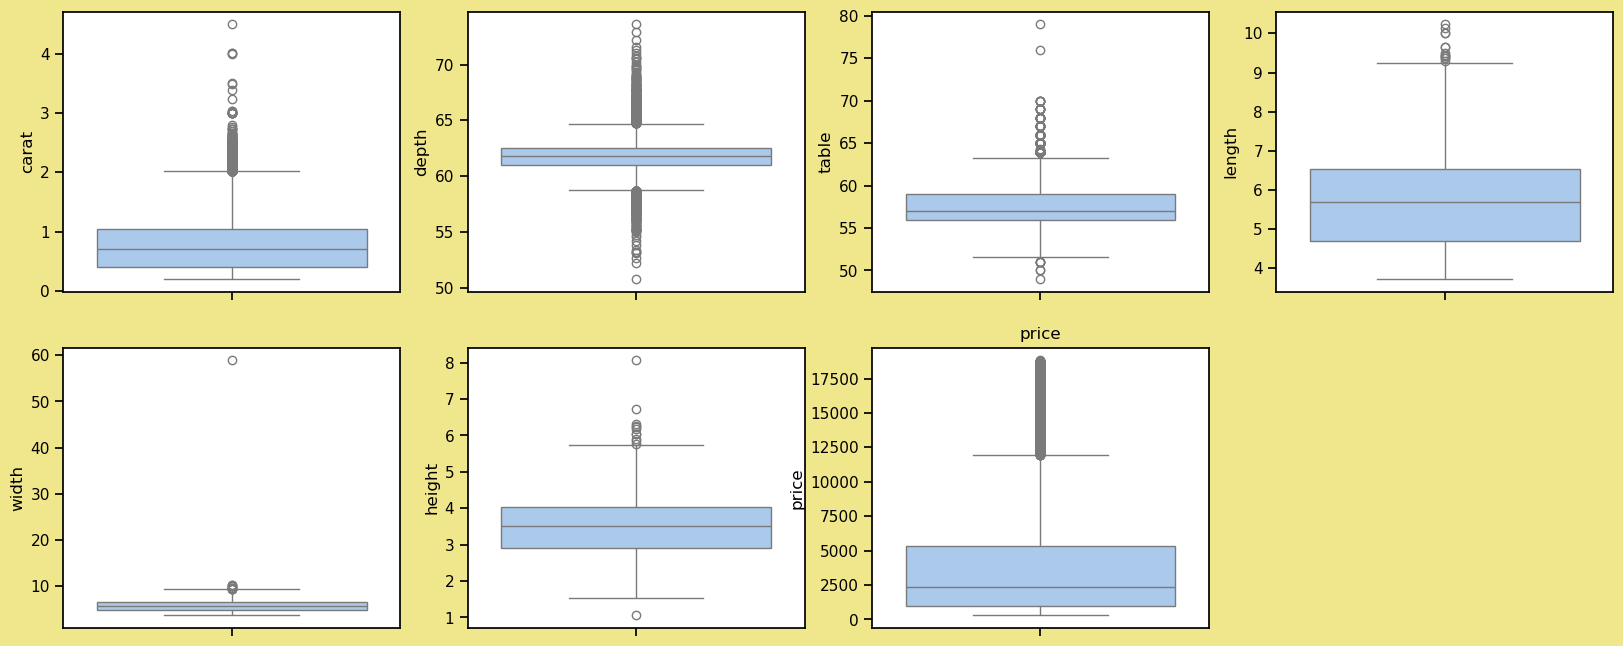

In [50]:
plt.figure(figsize=(20,8), facecolor= 'khaki');
sns.set_palette('pastel');
sns.set_context('notebook');

plt.subplot(2,4,1);
sns.boxplot(data= cz1, y= cz1.carat, orient= 'v')
#plt.title('carat')

plt.subplot(2,4,2);
sns.boxplot(data= cz1, y= cz1.depth, orient= 'v')
#plt.title('carat')

plt.subplot(2,4,3);
sns.boxplot(data= cz1, y= cz1.table, orient= 'v')
#plt.title('table')

plt.subplot(2,4,4);
sns.boxplot(data= cz1, y= cz1.length, orient= 'v')
#plt.title('length')

plt.subplot(2,4,5);
sns.boxplot(data= cz1, y= cz1.width, orient= 'v')
#plt.title('width')

plt.subplot(2,4,6);
sns.boxplot(data= cz1, y= cz1.height, orient= 'v')
#plt.title('height')

plt.subplot(2,4,7);  sns.boxplot(data= cz1, y= cz1.price, orient= 'v')
plt.title('price')

plt.show();

In [51]:
cz1.shape

(26228, 10)

### Summary report after performing Data Cleansing on the dataset:

>1. **Quality of the Import:** All the columns & columns names have been imported correctly
2. **Extents:** The dataset initially contained 26,967 rows & 11 columns<br>
3. **Columns Names:** The columns names 'x', 'y' & 'Z' were be re-named with what they actually represent (viz., length, width & height of the cubic zirconia)
4. **Datatypes:** The data-types reported by the info command is consistent  with the appearance of the data in the columns
5. **Droppable Columns** It has an ID column (Unnamed 0:) that does not add any value to the analysis and was dropped
6. **Missing Values:** The column **depth** contains about 3% of missing values [697 / 26967]. These were dropped
7. **Bad Data (zeroes):** The columns x(Length), y(Width) & z (Height) have ZEROs<br>
>   - column x(Length) has 3 entries with a zero value<br>
>   - column y(width) has 3 entries with a zero value<br>
>   - column z(height) has 9 entries with a zero value
>- These 9 rows were dropped<br>
>
> 8. **Check for Duplicate Columns / Rows:** 33 duplicate rows were removed<br>
9. **Outliers**: All the important columns have outliers<br>
> The decision reg treating the Ols will be taken after performing the Stat Analyses & before building the Model

**After the Data Cleansing the shape of the dataset is 26,228 rows & 10 columns**<br>
**We can now proceed to performing Statistical Analyses on the dataset.**

 <font color = blue>_**NOTE:** Decisions regarding Scaling/ Normalization, Encoding, Data Transformation etc ., will be taken up in the **Data Preparation Phase**_</font>

In [52]:
cz1.shape

(26228, 10)

## Statistical Analyses

### Statistical Analysis - Univariate:

- 5 number Summary 
- Skewness
- Visualization using histograms(kdepolts) & box plots

In [53]:
cz1.describe()

,carat,depth,table,length,width,height,price
count,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000
mean,0.797425,61.745573,57.455216,5.728685,5.732539,3.537417,3934.616288
std,0.476534,1.411824,2.230013,1.125010,1.164034,0.695979,4018.196388
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5355.250000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


<h3>Check for Skewness:</h3>

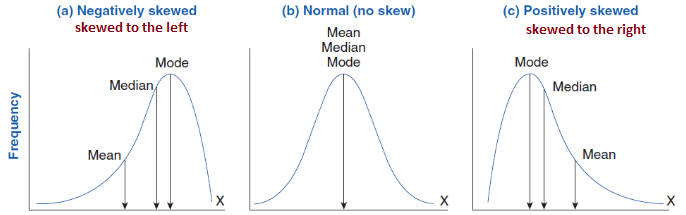

In [54]:
skew_vals = cz1.select_dtypes(include="number").skew()
skew_vals

carat     1.116084
depth    -0.025042
table     0.767838
length    0.401761
width     3.979609
height    0.408375
price     1.620558
dtype: float64

**The skewness values can be interpreted in the following manner:**<br>
<br>
 **- Highly skewed distribution:** If the skewness value is less than −1 or greater than +1<br>
 **- Moderately skewed distribution:** If the skewness value is between −1 and −½ or between +½ and +1<br>
 **- Approximately symmetric distribution:** If the skewness value is between −½ and +½

In [55]:
skew_vals = cz1.select_dtypes(include="number").skew()
print("\nS K E W N E S S   R E P O R T\n")

print("=============================")
print("Highly Skewed Distribution/s:")
print("=============================")
for col, val in skew_vals.items():
    if (val < -1) or (val > 1):
        print(col, round(val, 4))

print("\n===============================")
print("Moderately Skewed Distribution/s:")
print("===============================")
for col, val in skew_vals.items():
    if ((val > -1) and (val < -0.5)) or ((val > 0.5) and (val < 1)):
        print(col, round(val, 4))

print("\n====================================")
print("Approximately Symmetric Distribution/s:")
print("====================================")
for col, val in skew_vals.items():
    if (val > -0.5) and (val < 0.5):
        print(col, round(val, 4))



S K E W N E S S   R E P O R T

Highly Skewed Distribution/s:
carat 1.1161
width 3.9796
price 1.6206

Moderately Skewed Distribution/s:
table 0.7678

Approximately Symmetric Distribution/s:
depth -0.025
length 0.4018
height 0.4084


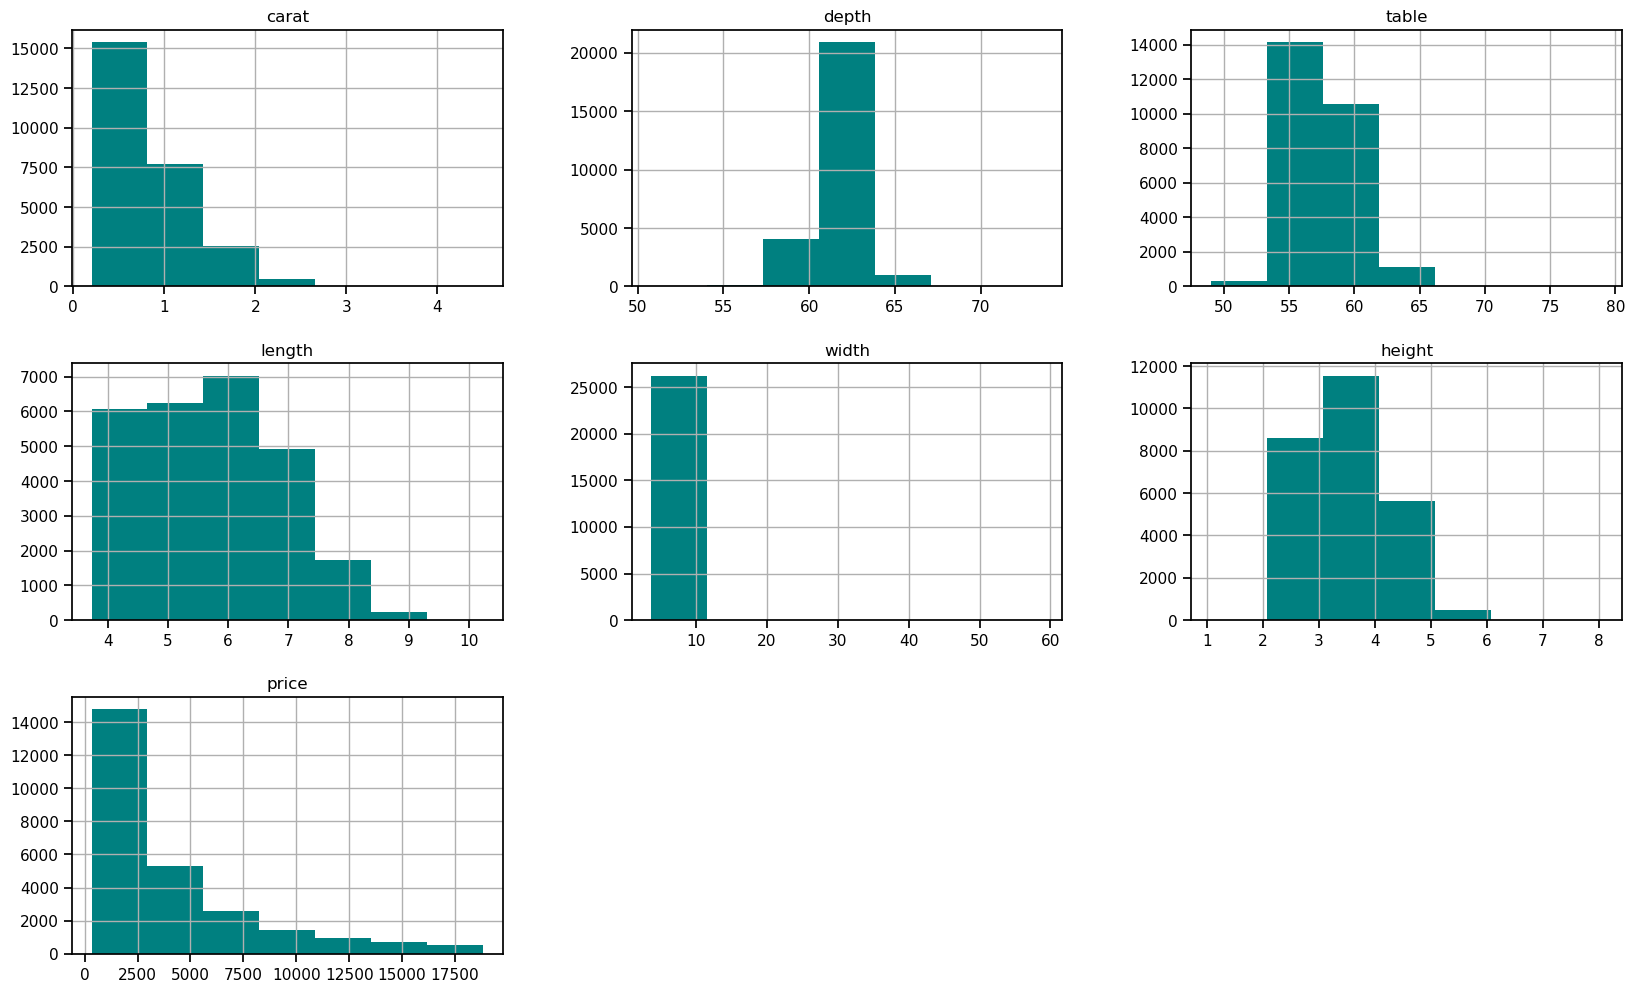

In [56]:
cz1.hist(bins= 7, figsize= (20,12), color= 'teal')
plt.show();

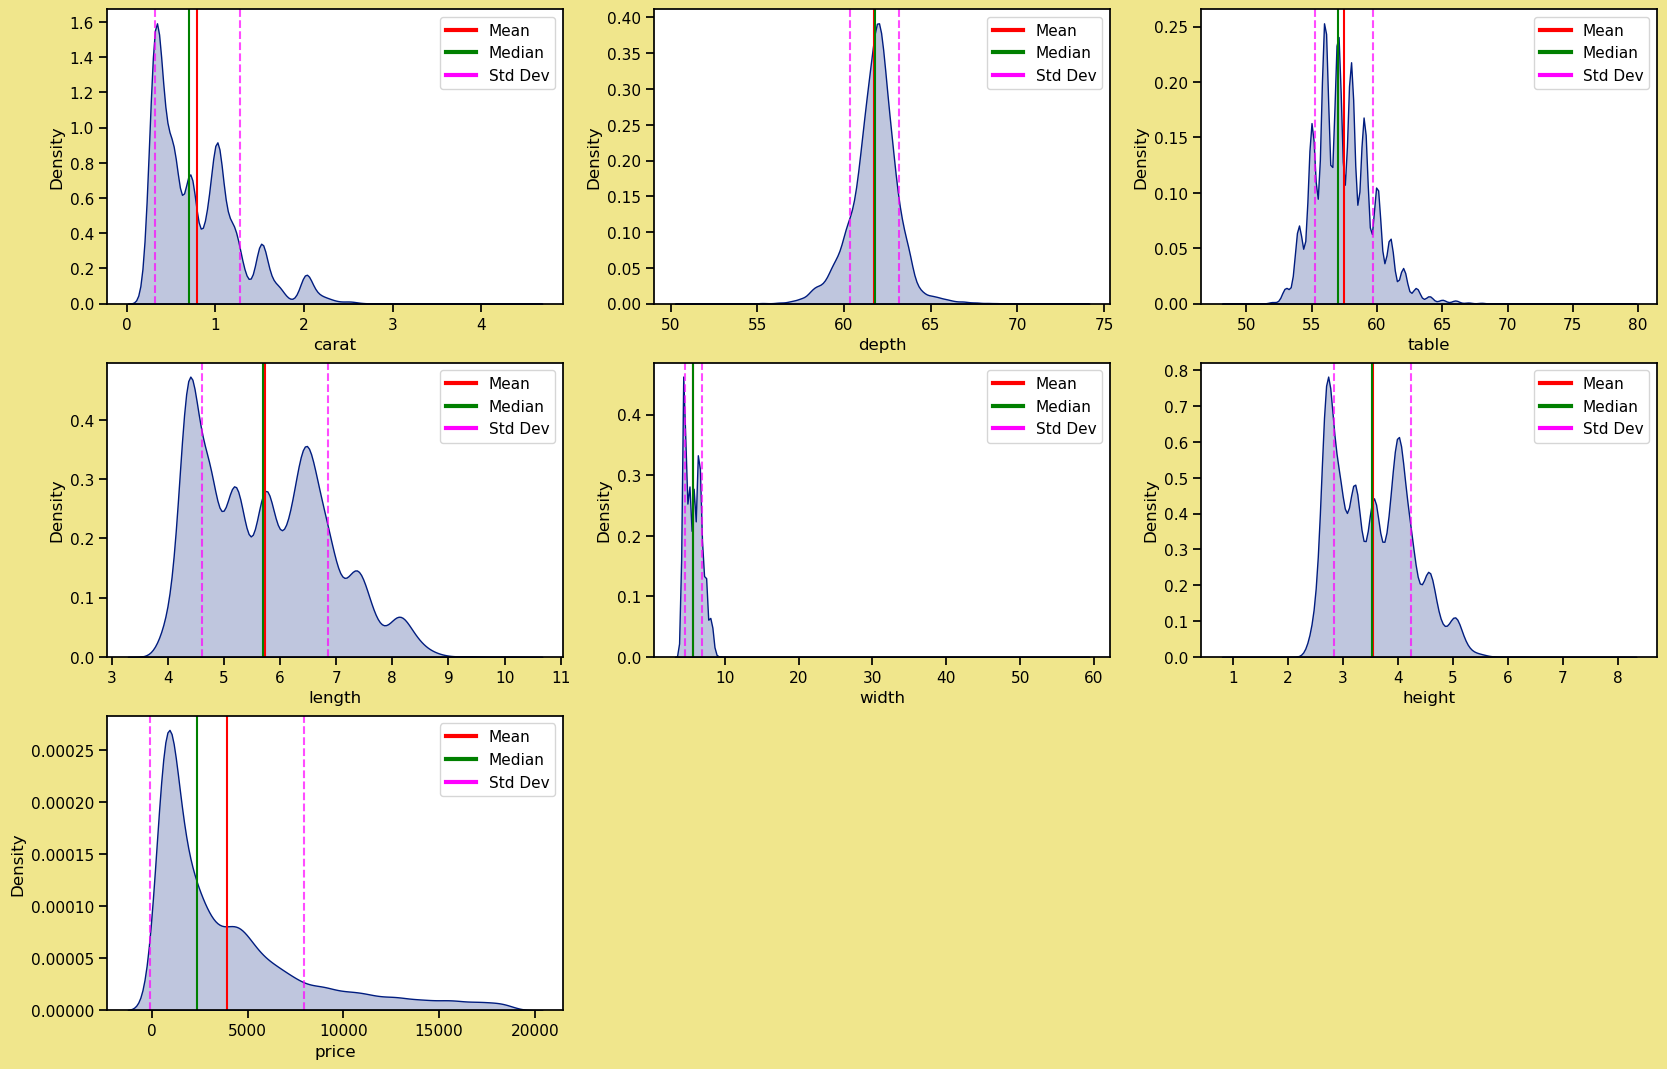

In [57]:
from matplotlib.lines import Line2D

plt.figure(figsize=(20,13), facecolor= 'khaki');
sns.set_palette("dark")
sns.set_context('notebook');

for each_col, n in zip(num_cols,range(8)):
    #print(each_col, n+1)
    #print(type(each_col))
    #style.use('seaborn-whitegrid')
    plt.subplot(3, 3, n+1);
    sns.kdeplot(cz1[each_col], fill=True, legend=True)
    
    plt.axvline(x = np.mean(cz1[each_col]), color= 'red');
    plt.axvline(x = np.median(cz1[each_col]), color= 'green');
    plt.axvline(x=np.mean(cz1[each_col]) - np.std(cz1[each_col]), ls= "--", color= 'magenta', alpha=0.7);
    plt.axvline(x=np.mean(cz1[each_col]) + np.std(cz1[each_col]),  ls= "--", color= 'magenta', alpha=0.7);
    
    
    custom_lines = [Line2D([0], [0], color='red', lw=3),
                    Line2D([0], [0], color='green', lw=3),
                    Line2D([0], [0], color='magenta', lw=3)]
    
    plt.legend(custom_lines, ['Mean', 'Median', 'Std Dev']);
plt.show();

**Observations:**<br>
1. depth, table & width are not skewed much 
2. carat, length & height are skewed to the right and are multi-modal
3. Target variable Price demonstrates a extreme right skew**

**Analysis of Features with Categorical Data**

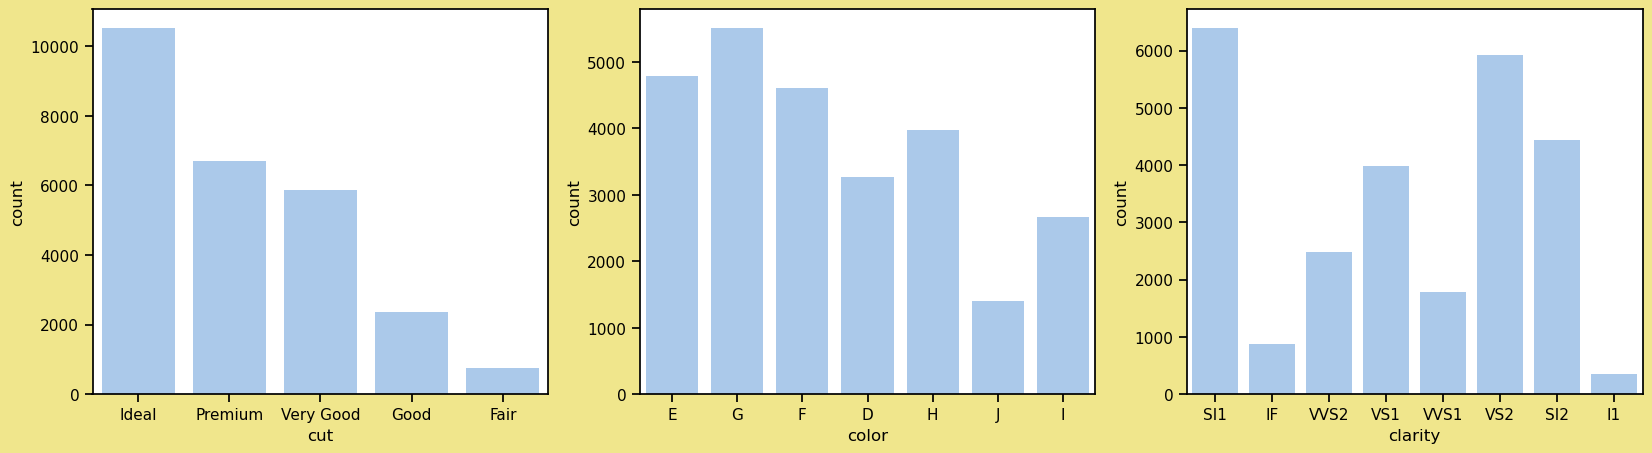

In [58]:
plt.figure(figsize=(20,5), facecolor= 'khaki');
sns.set_palette('pastel');
sns.set_context('notebook');

plt.subplot(1,3,1);
sns.countplot(data= cz1, x= 'cut')

plt.subplot(1,3,2);
sns.countplot(data= cz1, x= 'color')

plt.subplot(1,3,3);
sns.countplot(data= cz1, x= 'clarity')

plt.show();

In [59]:
cz1.cut.value_counts()

cut
Ideal        10535
Premium       6688
Very Good     5875
Good          2375
Fair           755
Name: count, dtype: int64

In [60]:
cz1.color.value_counts()

color
G    5518
E    4792
F    4605
H    3980
D    3265
I    2670
J    1398
Name: count, dtype: int64

In [61]:
cz1.clarity.value_counts()

clarity
SI1     6401
VS2     5918
SI2     4433
VS1     3984
VVS2    2478
VVS1    1791
IF       871
I1       352
Name: count, dtype: int64

### Statistical Analysis - Bivariate:

- Co-relation Matrix
- Visualization using Scatter Plot(pairplot) & Heatmap
- Checks for Multi-Collinearity

**Co-Relation Matrix**

A correlation matrix is a table or matrix that shows the correlation between multiple variables. It is used to determine the strength and direction of the relationship between each pair of variables called the **correlation coefficient**. It ranges from -1 to 1, with values closer to -1 indicating a strong negative correlation, values closer to 0 indicating no correlation, and values closer to 1 indicating a strong positive correlation.

- rows and columns represent the variables being analyzed
- number inside the cells is the correlation coefficient


Correlation matrix when used in conjunction with other statistical techniques, such as regression analysis ,can help identify 
patterns in data.

In [62]:
cz1.select_dtypes(include="number").corr()

,carat,depth,table,length,width,height,price
carat,1.000000,0.035575,0.181592,0.977881,0.941439,0.976150,0.922116
depth,0.035575,1.000000,-0.297411,-0.018465,-0.024532,0.101382,-0.002736
table,0.181592,-0.297411,1.000000,0.197504,0.183406,0.157704,0.126612
length,0.977881,-0.018465,0.197504,1.000000,0.961537,0.990733,0.887243
width,0.941439,-0.024532,0.183406,0.961537,1.000000,0.961027,0.856199
height,0.976150,0.101382,0.157704,0.990733,0.961027,1.000000,0.882059
price,0.922116,-0.002736,0.126612,0.887243,0.856199,0.882059,1.000000


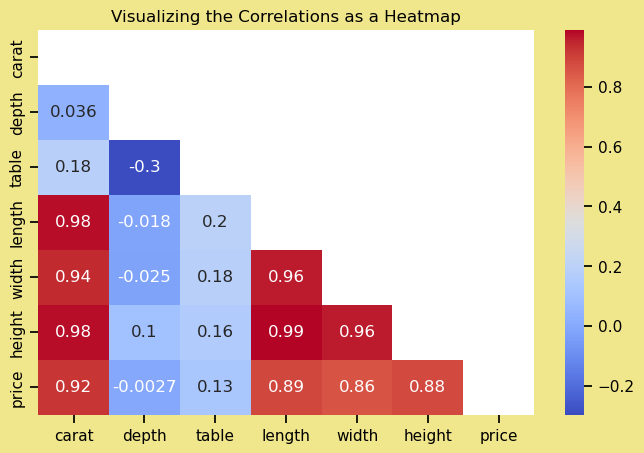

In [63]:
# Compute correlation matrix once using only numeric columns
corr_matrix = cz1.select_dtypes(include="number").corr()

# Create a mask the size of the correlation matrix
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.figure(figsize=(8, 5), facecolor="khaki")

# Create the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    mask=mask
)

plt.title("Visualizing the Correlations as a Heatmap")
plt.show();

The heatmap above depicts the pair-wise co-relation between the 7 features ie., 21 feature-pairs.<br>
We see that there is ... <br>
- **a Strong Positive Co-Relation** (corr > 0.85) ------------->> is seen among 10 feature-pairs
- **a Modetate Positive Co-Relation** (0.35 < corr < 0.85) -->> is seen among NIL feature-pairs
- **a Weak Positive Co-Relation** (0 < corr < 0.35) ----->> is seen among 7 feature-pairs AND
- **a Weak Negative Co-Relation** (-0.35 < corr < 0) ----->> is seen among 4 feature-pairs<br>

**Visualization using Scatter Plot(pairplot) & Heatmap**

<Figure size 2000x1000 with 0 Axes>

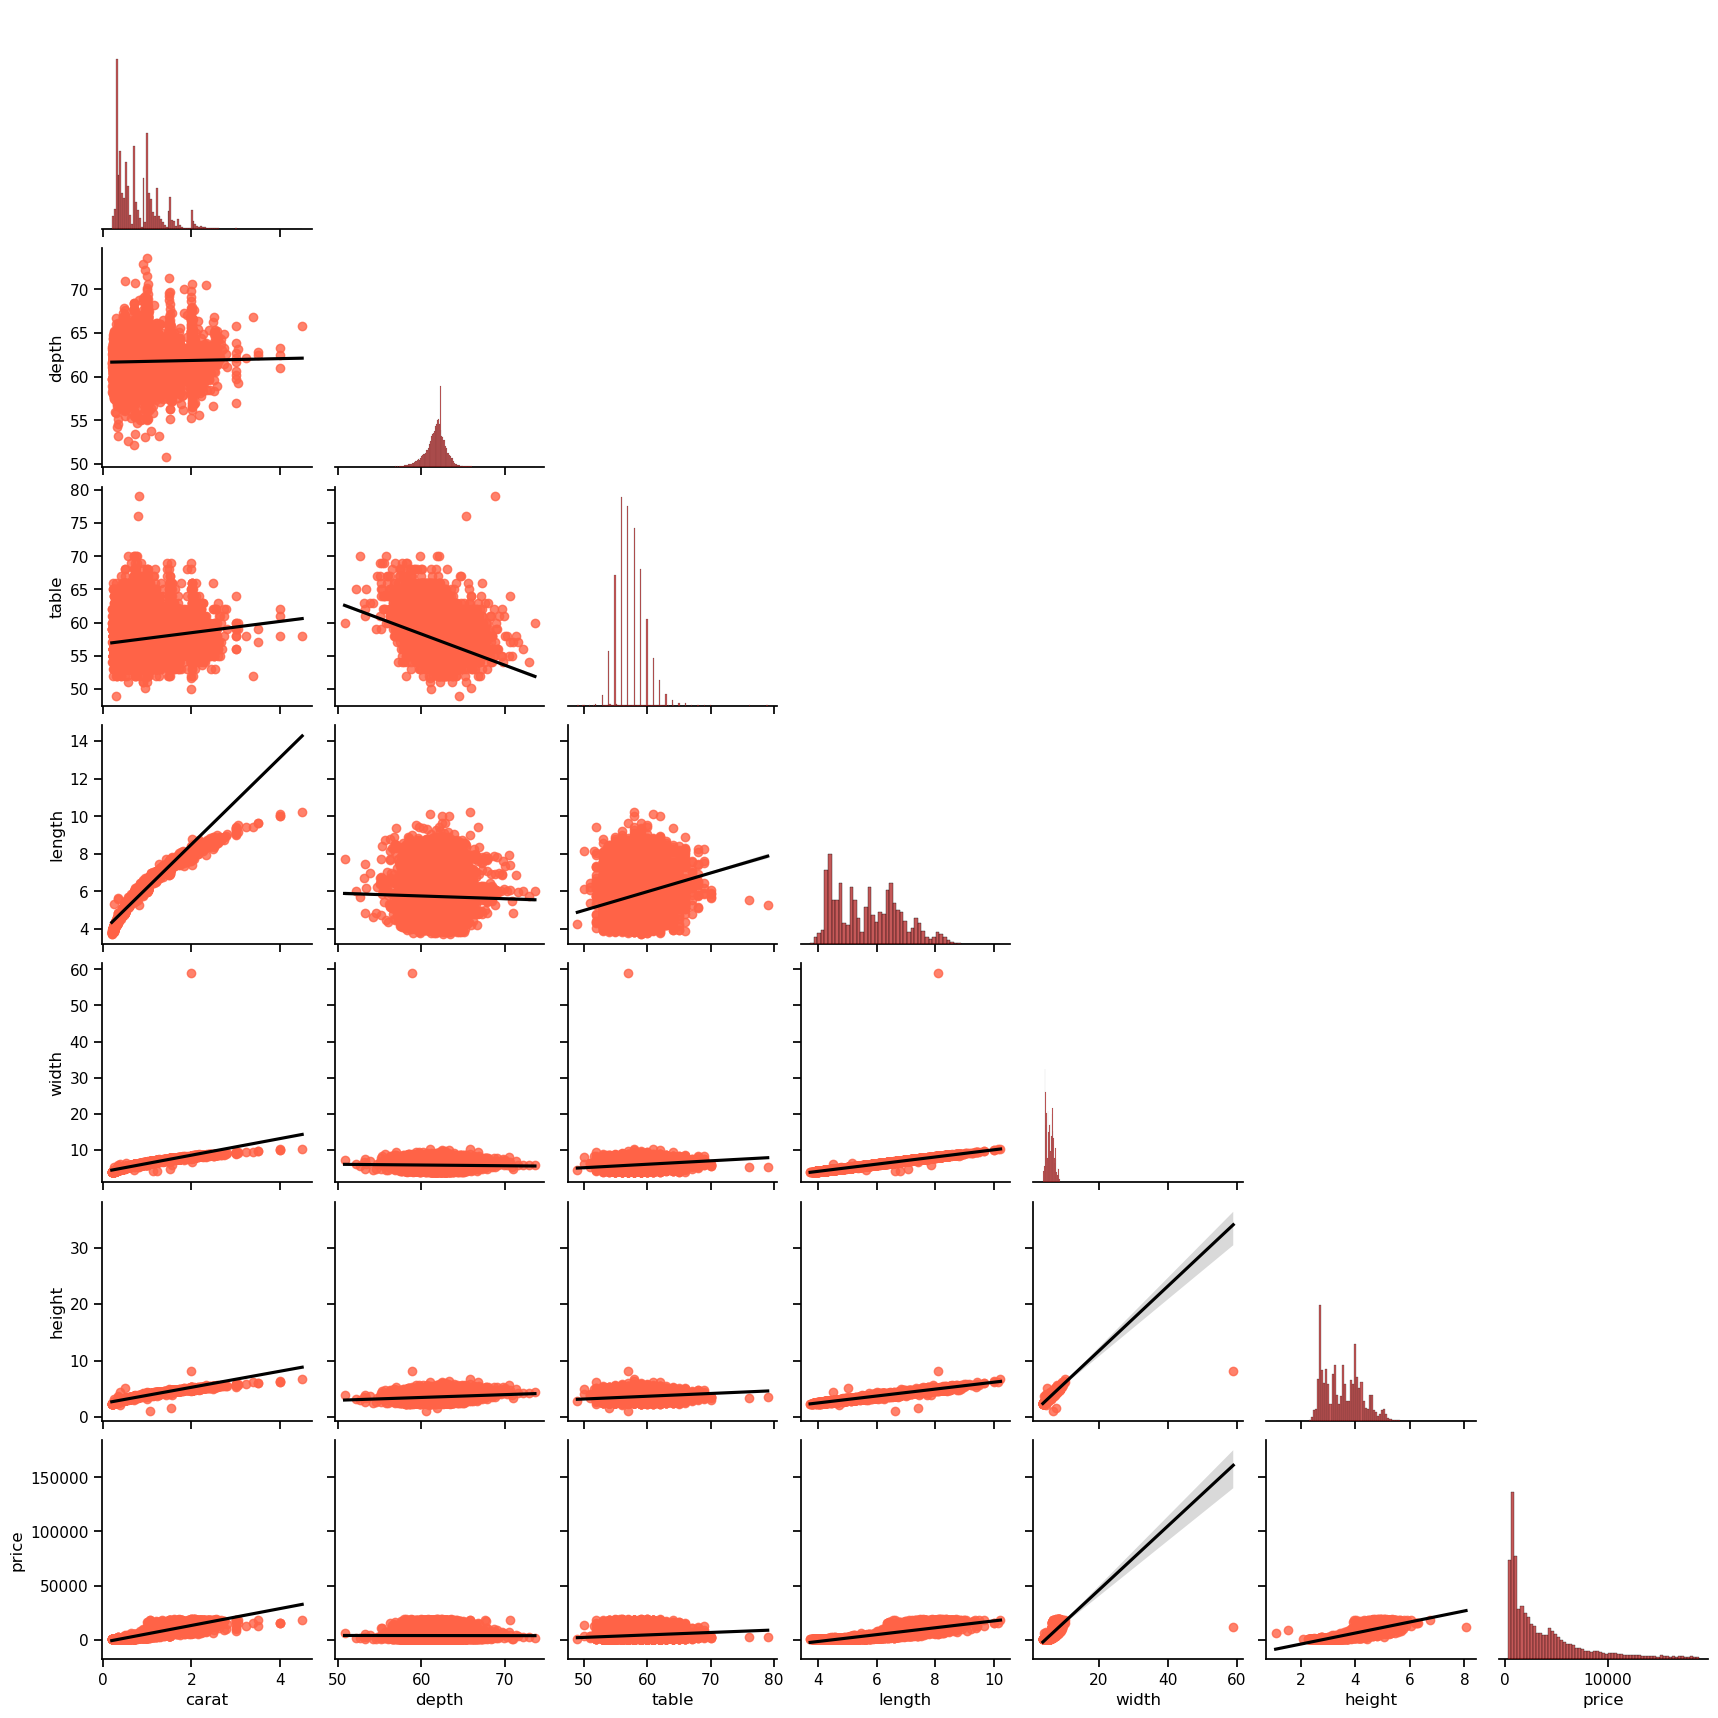

In [64]:
plt.figure(figsize=(20,10), facecolor= "khaki");
#sns.set_context('talk');
sns.pairplot(data= cz1, kind= 'reg',
             diag_kws= {'color':"firebrick"},  
             plot_kws= {"color":"black", 'scatter_kws': {"color": "tomato"}},
             corner = True);
plt.show();

**Bivariate analysis on features with categorical data**

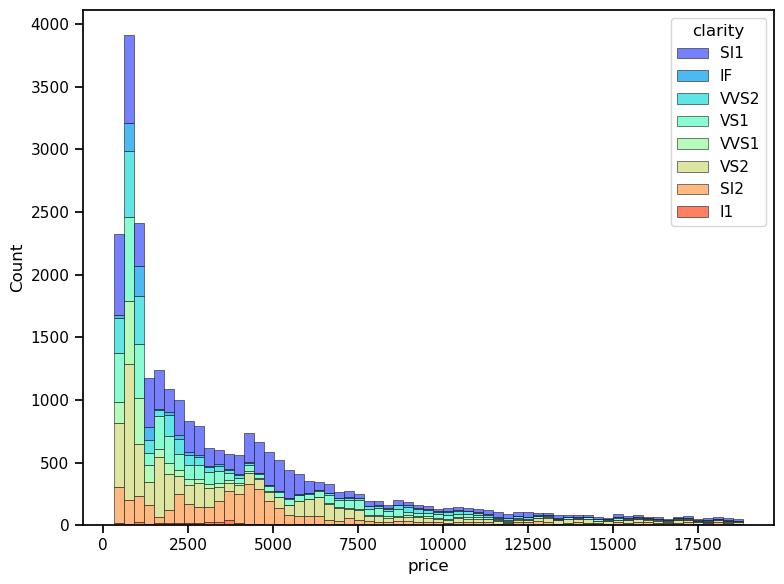

CPU times: user 428 ms, sys: 11.3 ms, total: 440 ms
Wall time: 471 ms


In [65]:
%%time
sns.set_context("notebook");
plt.subplots(figsize = (8,6));
sns.histplot(cz1, x= 'price', hue= 'clarity',
             multiple= "stack", 
             edgecolor= "0.1",
             linewidth= 0.4,
             log_scale = False,
             palette= 'rainbow');
plt.tight_layout();
plt.show();

### Data Preparation:

- **Encoding**
- **Outlier Treatment**

**Encoding**

**1. Encoding:** the features with categorical data.<br>
There is a clear order mentioned in the Data Dictionary for each sub-category under the features Cut, Color & Clarity<br>
So, we will perform **LABEL ENCODING** <br>

Before performing the label encoding, we will check if we can **merge any of the sub-categories** of Cut | Color | Clarity<br>
The initial urge is to merge as follows (purely based on the descriptions in the data dictionary):<br>

**MERGE & LABEL Encoding SCHEME :**
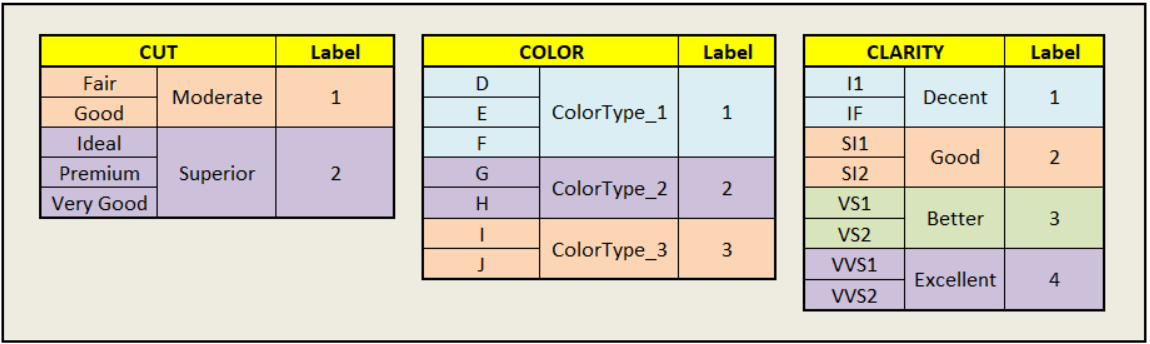

**However:**
- It is NOT mandatory the sub-categories be merged
- For the merges to be justified, we need proper domain understanding of the relative significance of each sub-category under each feature<br>
- In the absence of the above, we will still try if we can find some **statistical basis** to justify the merges<br>
    - Let's compare the average of all **7 numeric predictors** with each sub-category of Cut, Color & Clarity separately<br>
    - Let's also compare the **average price**  with each sub-category of Cut, Color & Clarity separately<br>
        - We will create plots of the Averages based on the PIVOT TABLES to visualize the same<br>
        we will also cross-validate the outputs by pivot tables created in excel with the same cleaned dataset

**NOTE**<br>
**Decision >> To Merge OR Not to Merge**<br>
We decide to proceed with merging the sub-categories based on the **Merge & Label Encoding scheme** above BUT with the following realization :
 - The above patterns are in NO way are a strong justification to perform the merges,
 - will are performing the merges - as this is a academic / learning exercise !! 

**Custom Label Encoding:** <br>
- we prefer to perform the encoding manually to ensure that the ORDINALS are not lost out
- using either the sklearn's LabelEncoder class OR pandas method categorical is wrought with the risk of mix-up of the ORDERs due the alphabetization basis that is inherent in these algorithms**

<font color = green>**=====================================================================================================**<br>
Make a copy of the dataframe **cz1** as **cz1_encoded** & perform the encoding on this newly created dataframe<br>
**=====================================================================================================**</font>

In [66]:
# cz1_encoded = cz1  # # this makes a shallow copy - not advisable, not advisable
cz1_encoded = cz1.copy(deep= True)  # We will make a deep copy

****Manual Encoding the sub-categories of the feature = CUT****

In [67]:
# Manual Encoding the sub-categories of the feature = CUT
cut_mapping = {
    "Fair": 1,
    "Good": 1,
    "Ideal": 2,
    "Premium": 2,
    "Very Good": 2
}

cz1_encoded["cut"] = cz1_encoded["cut"].map(cut_mapping).astype(int)

In [68]:
# Verify the Value Counts afer the Encoding
print("\nFeature COLOR: Value Counts before Encoding")
cz1.cut.value_counts()
print("\nFeature COLOR: Value Counts after Encoding")
cz1_encoded.cut.value_counts()


Feature COLOR: Value Counts before Encoding


cut
Ideal        10535
Premium       6688
Very Good     5875
Good          2375
Fair           755
Name: count, dtype: int64


Feature COLOR: Value Counts after Encoding


cut
2    23098
1     3130
Name: count, dtype: int64

**Manual Encoding the sub-categories of the feature = COLOR**

In [69]:
# Manual Encoding the sub-categories of the feature = COLOR
color_mapping = {
    "D": 1,
    "E": 1,
    "F": 1,
    "G": 2,
    "H": 2,
    "I": 3,
    "J": 3
}

cz1_encoded["color"] = (
    cz1_encoded["color"]
    .map(color_mapping)
    .astype(int)
)


In [70]:
# Verify the Value Counts afer the Encoding
print("\nFeature COLOR: Value Counts before Encoding")
cz1.color.value_counts()
print("\nFeature COLOR: Value Counts after Encoding")
cz1_encoded.color.value_counts()


Feature COLOR: Value Counts before Encoding


color
G    5518
E    4792
F    4605
H    3980
D    3265
I    2670
J    1398
Name: count, dtype: int64


Feature COLOR: Value Counts after Encoding


color
1    12662
2     9498
3     4068
Name: count, dtype: int64

**Manual Encoding the sub-categories of the feature = CLARITY**

In [71]:
cz1.clarity.value_counts()

clarity
SI1     6401
VS2     5918
SI2     4433
VS1     3984
VVS2    2478
VVS1    1791
IF       871
I1       352
Name: count, dtype: int64

In [72]:
# Manual Encoding the sub-categories of the feature = CLARITY
clarity_mapping = {
    "I1": 1,
    "IF": 1,
    "SI1": 2,
    "SI2": 2,
    "VS1": 3,
    "VS2": 3,
    "VVS1": 4,
    "VVS2": 4
}

cz1_encoded["clarity"] = (
    cz1_encoded["clarity"]
    .map(clarity_mapping)
    .astype(int)
)

In [73]:
# Verify the Value Counts afer the Encoding
print("\nFeature CLARITY: Value Counts before Encoding")
cz1.clarity.value_counts()
print("\nFeature CLARITY: Value Counts after Encoding")
cz1_encoded.clarity.value_counts()


Feature CLARITY: Value Counts before Encoding


clarity
SI1     6401
VS2     5918
SI2     4433
VS1     3984
VVS2    2478
VVS1    1791
IF       871
I1       352
Name: count, dtype: int64


Feature CLARITY: Value Counts after Encoding


clarity
2    10834
3     9902
4     4269
1     1223
Name: count, dtype: int64

**Checking the data types of the features after the Encoding**

In [74]:
cz1.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
length     float64
width      float64
height     float64
price      float64
dtype: object

In [75]:
cz1_encoded.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
length     float64
width      float64
height     float64
price      float64
dtype: object

**Encoding has been completed successfully & Verified OK**

In [76]:
# Visualizing the top5 and bottom 5 rows of the dataset after encoding
cz1_encoded

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,2,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,1,4,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,2,1,3,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,2,1,4,60.4,59.0,4.35,4.43,2.65,779.0
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,2,2,2,62.3,58.0,6.61,6.52,4.09,5408.0
26963,0.33,2,2,1,61.9,55.0,4.44,4.42,2.74,1114.0
26964,0.51,2,1,3,61.7,58.0,5.12,5.15,3.17,1656.0
26965,0.27,2,1,4,61.8,56.0,4.19,4.20,2.60,682.0


**Outlier Treatment**

**Outlier Treatment Strategy:**<br>
**We will prefer to replace the outliers using the flooring & capping strategy considering the following:**
1. Relatively very small percentage of the outliers for all features
2. As seen in the hist-plots in Univariate Analysis above -the mean and median are close for most of the variables (except price)

**carat :**<br>
 lower_bound= -0.5750000000000001<br>
 upper_bound= 2.0250000000000004<br>

**depth :**<br>
 lower_bound= 58.75<br>
 upper_bound= 64.75<br>

**table :**<br>
 lower_bound= 51.5<br>
 upper_bound= 63.5<br>

**length :**<br>
 lower_bound= 1.9649999999999999<br>
 upper_bound= 9.285<br>

**width :**<br>
 lower_bound= 1.9899999999999993<br>
 upper_bound= 9.27<br>

**height :**<br>
 lower_bound= 1.1899999999999997<br>
 upper_bound= 5.75<br>

**price :**<br>
 lower_bound= -5670.375<br>
 upper_bound= 11970.625

In [77]:
cz1_encoded['carat'] = np.where(cz1_encoded['carat'] < -0.5750000000000001, 
                              -0.5750000000000001, cz1_encoded['carat'] )

cz1_encoded['carat'] = np.where(cz1_encoded['carat'] > 2.0250000000000004, 
                              2.0250000000000004, cz1_encoded['carat'] )

In [78]:
cz1_encoded['depth'] = np.where(cz1_encoded['depth'] < 58.75, 
                              58.75, cz1_encoded['depth'] )

cz1_encoded['depth'] = np.where(cz1_encoded['depth'] > 64.75, 
                              64.75, cz1_encoded['depth'] )

In [79]:
cz1_encoded['table'] = np.where(cz1_encoded['table'] < 51.5, 
                              51.5, cz1_encoded['table'] )

cz1_encoded['table'] = np.where(cz1_encoded['table'] > 63.5, 
                              63.5, cz1_encoded['table'] )

In [80]:
cz1_encoded['length'] = np.where(cz1_encoded['length'] < 1.9649999999999999, 
                              1.9649999999999999, cz1_encoded['length'] )

cz1_encoded['length'] = np.where(cz1_encoded['length'] > 9.285, 
                              9.285, cz1_encoded['length'] )

In [81]:
cz1_encoded['width'] = np.where(cz1_encoded['width'] < 1.9899999999999993, 
                              1.9899999999999993, cz1_encoded['width'] )

cz1_encoded['width'] = np.where(cz1_encoded['width'] > 9.27, 
                              9.27, cz1_encoded['width'] )

In [82]:
cz1_encoded['height'] = np.where(cz1_encoded['height'] < 1.1899999999999997, 
                              1.1899999999999997, cz1_encoded['height'] )

cz1_encoded['height'] = np.where(cz1_encoded['height'] > 5.75, 
                              5.75, cz1_encoded['height'] )

In [83]:
cz1_encoded['price'] = np.where(cz1_encoded['price'] < -5670.375, 
                              -5670.375, cz1_encoded['price'] )

cz1_encoded['price'] = np.where(cz1_encoded['price'] > 11970.625, 
                              11970.625, cz1_encoded['price'] )

**Verify the removal of Outliers - Box Plots**

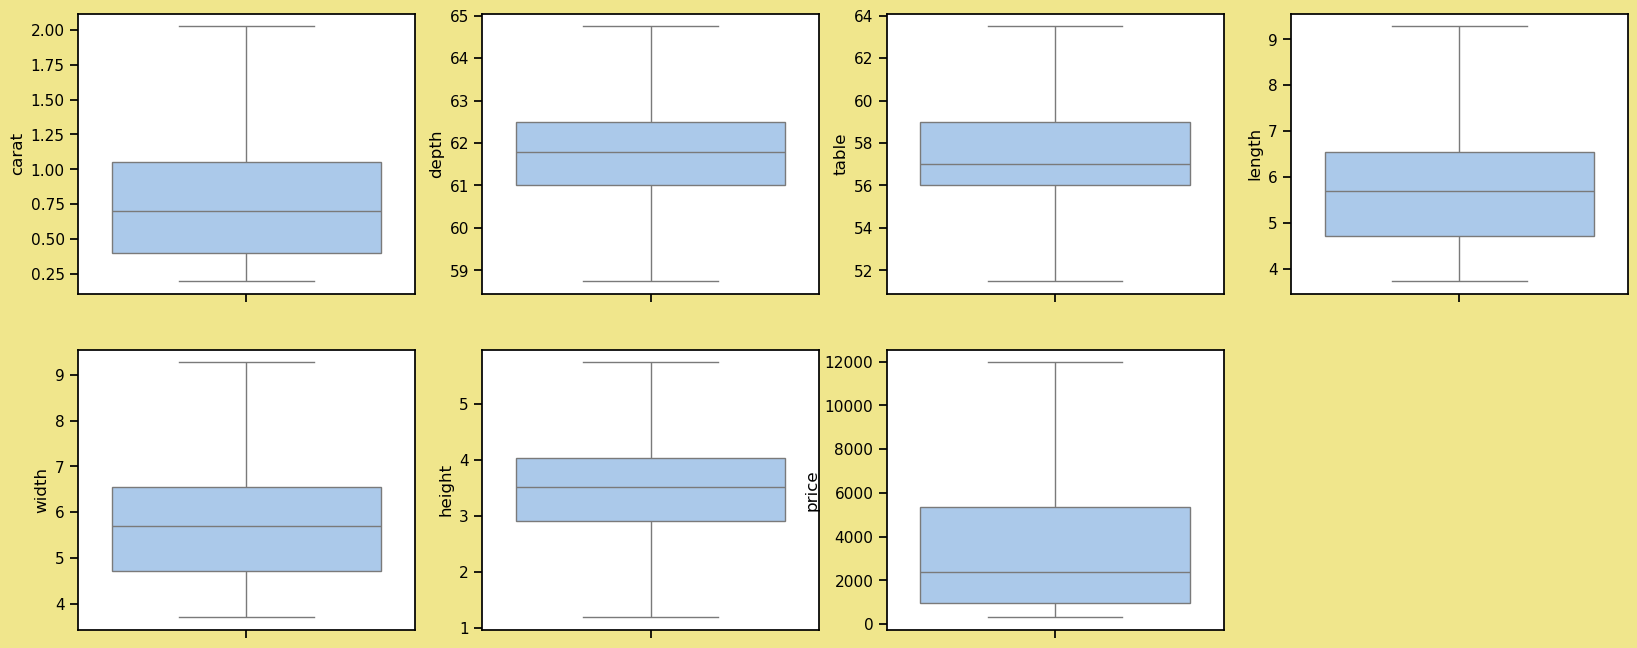

In [84]:
plt.figure(figsize=(20,8), facecolor= 'khaki');
sns.set_palette('pastel');
sns.set_context('notebook');

plt.subplot(2,4,1);
sns.boxplot(data= cz1_encoded, y= cz1_encoded.carat, orient= 'v')
#plt.title('carat')

plt.subplot(2,4,2);
sns.boxplot(data= cz1_encoded, y= cz1_encoded.depth, orient= 'v')
#plt.title('carat')

plt.subplot(2,4,3);
sns.boxplot(data= cz1_encoded, y= cz1_encoded.table, orient= 'v')
#plt.title('table')

plt.subplot(2,4,4);
sns.boxplot(data= cz1_encoded, y= cz1_encoded.length, orient= 'v')
#plt.title('length')

plt.subplot(2,4,5);
sns.boxplot(data= cz1_encoded, y= cz1_encoded.width, orient= 'v')
#plt.title('width')

plt.subplot(2,4,6);
sns.boxplot(data= cz1_encoded, y= cz1_encoded.height, orient= 'v')
#plt.title('height')

plt.subplot(2,4,7);
sns.boxplot(data= cz1_encoded, y= cz1_encoded.price, orient= 'v')
#plt.title('price')

plt.show();

**The Outlier Removal is successful**

<font color = green>**=====================================================================================================**<br>
Make a copy of the dataframe **cz1_encoded** as **cz1_prepared** & perform the Train-Test Split on this newly created dataframe<br>
**=====================================================================================================**</font>

In [85]:
# cz1_prepared = cz1_encoded  # this makes a shallow copy - not advisable
cz1_prepared = cz1_encoded.copy(deep= True)  # We will make a deep copy

<Figure size 2000x1000 with 0 Axes>

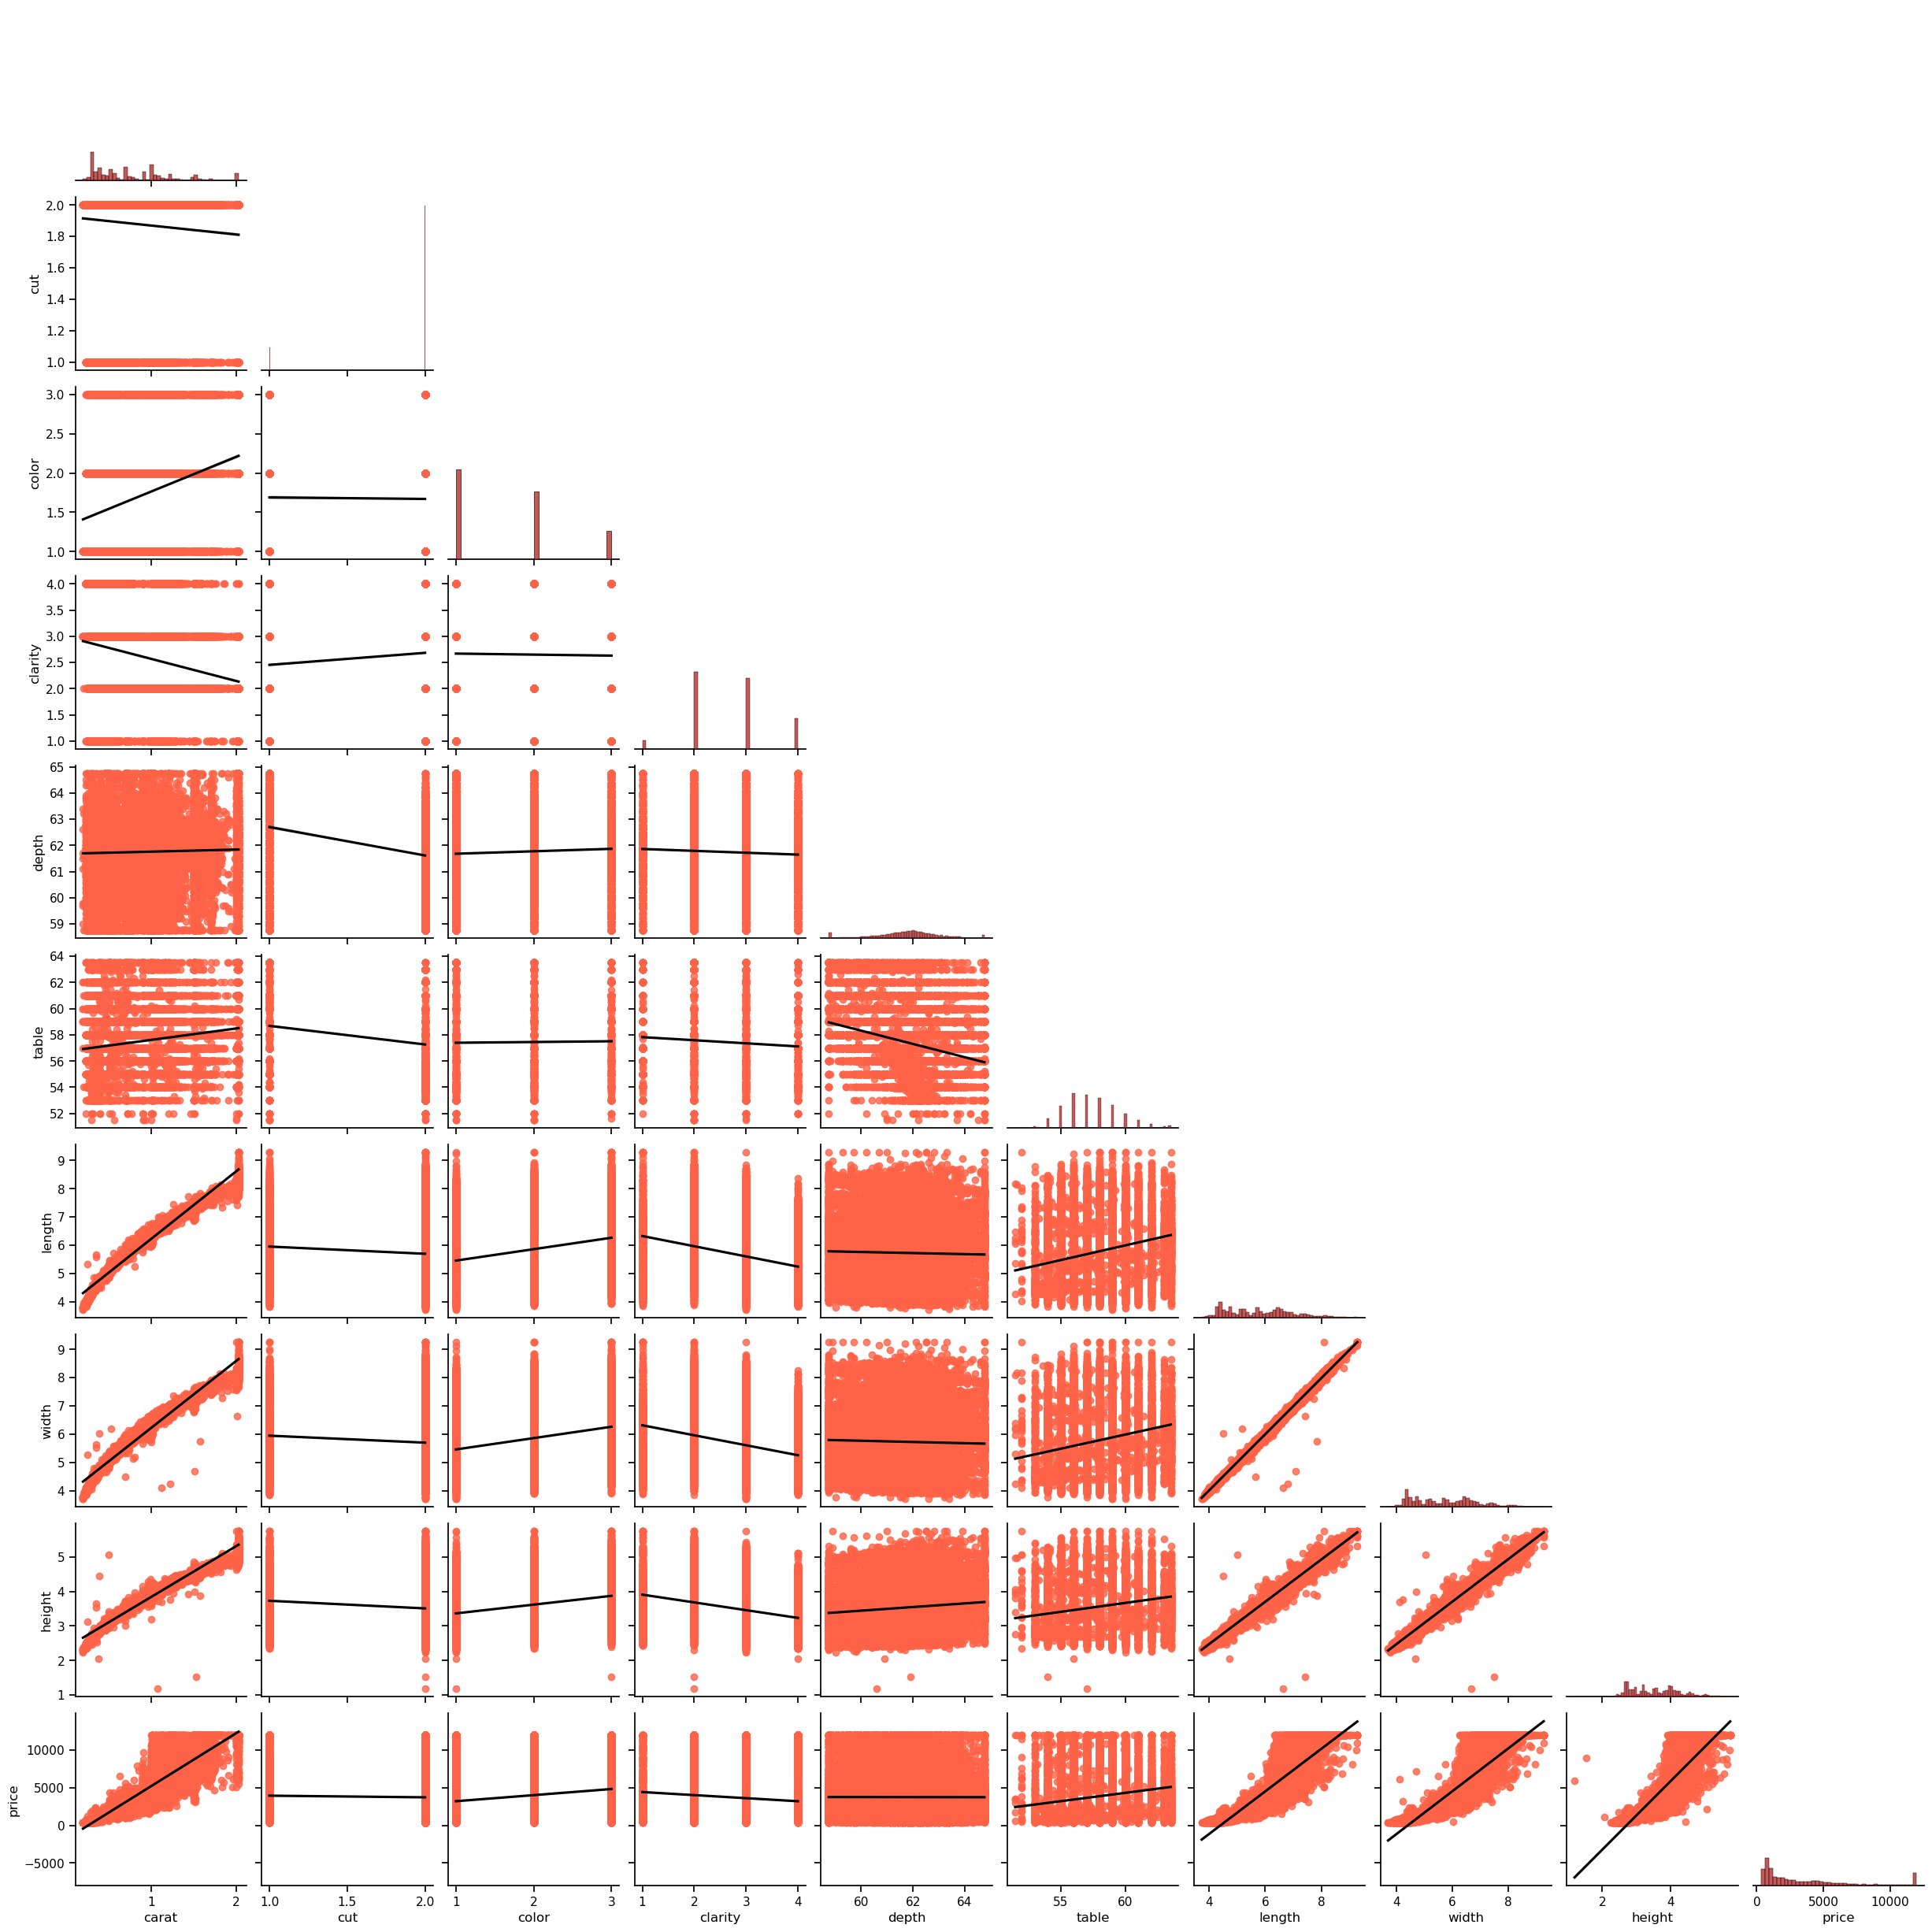

In [86]:
plt.figure(figsize=(20,10), facecolor= "khaki");
#sns.set_context('talk');
sns.pairplot(data= cz1_prepared, kind= 'reg',
             diag_kws= {'color':"firebrick"},  
             plot_kws= {"color":"black", 'scatter_kws': {"color": "tomato"}},
             corner = True);
plt.show();

**Observation**
The OL treatment performed during Data Preparation  has altered the Multi-collinearity of the dataset quite a bit !

## Perform Train-Test Split

**Seperating the Predictor Variables(X) & the Target Variables(y)**

In [87]:
cz1_prepared.head()
cz1_prepared.shape

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,2,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,1,4,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,2,1,3,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,2,1,4,60.4,59.0,4.35,4.43,2.65,779.0


(26228, 10)

In [88]:
X = cz1_prepared.drop(axis=1, columns= 'price', inplace= False)
X.shape
X.head()

(26228, 9)

,carat,cut,color,clarity,depth,table,length,width,height
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,2,2,1,60.8,58.0,4.42,4.46,2.70
2,0.90,2,1,4,62.2,60.0,6.04,6.12,3.78
3,0.42,2,1,3,61.6,56.0,4.82,4.80,2.96
4,0.31,2,1,4,60.4,59.0,4.35,4.43,2.65


In [89]:
y = cz1_prepared.pop('price')
y.shape
y.head()

(26228,)

0     499.0
1     984.0
2    6289.0
3    1082.0
4     779.0
Name: price, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random Train & Test subsets

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 1)

In [92]:
X_train.shape
X_test.shape

(18359, 9)

(7869, 9)

In [93]:
y_train.shape
y_test.shape

(18359,)

(7869,)

## Perform Multiple Linear Regression

### i. Multiple Linear Regression: SkLearn

In [94]:
from sklearn.linear_model import LinearRegression   # Ordinary least squares Linear Regression
# fits a linear model with coefficients by minimizing the residual Sum Of Squares - actual vs predicted

#### Build the Model & fit  it with Train data

In [95]:
sk_LRM_1 = LinearRegression()    # instantiate the class / create an object instance
sk_LRM_1.fit(X_train, y_train)   # train the model using train data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Extracting Model Outputs (Intercept and Co-efficients)

In [96]:
print("Intercept returned by the Model (with Train Set):")
print("===================================================")
np.round(sk_LRM_1.intercept_, 2)

Intercept returned by the Model (with Train Set):


np.float64(1395.33)

In [97]:
cz1_prepared.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'length', 'width',
       'height'],
      dtype='object')

In [98]:
print("\nTable of Co-Efficients - learnt by the model (with train set)")
print("==============================================================")
df_coeffs1 = pd.DataFrame(np.column_stack((cz1_prepared.columns, np.round(sk_LRM_1.coef_, 3))))
df_coeffs1.rename(columns= { 0 : "Feature Name" , 1 : "Co-efficients" }, inplace= True)
df_coeffs1.rename_axis(columns= ["SlNo"], inplace= True)
df_coeffs1.index = df_coeffs1.index + 1
df_coeffs1


Table of Co-Efficients - learnt by the model (with train set)


SlNo,Feature Name,Co-efficients
1,carat,9155.567
2,cut,364.221
3,color,-543.098
4,clarity,614.682
5,depth,4.6
6,table,-51.478
7,length,-1598.532
8,width,1727.327
9,height,-1244.965


**Observations reg the Co-Efficients:**<br>
1. Clearly, there is a conflict with the co-relation seen in the pair-plot vis-a-vis the co-efficients returned by the model !

**Cause:** This is an indicator of the multi-collinearity that exists within the predictor variables

In [99]:
from sklearn import metrics

#### Co-efficient of Determination

**Co-efficient of Determination**<br>
**Model Score (R-Squared): Train Set:**

In [100]:
sk_LRM_1.score(X_train, y_train)

0.9139647555289683

**Co-efficient of Determination**<br>
**Model Score (R-Squared): Test Set:**

In [101]:
sk_LRM_1.score(X_test, y_test)

0.9101780038755747

#### RMSE : Train Set

In [102]:
predicted_train = sk_LRM_1.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

np.float64(1017.128480236035)

#### RMSE : Test Set

In [103]:
predicted_test = sk_LRM_1.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

np.float64(1036.2878146902713)

**Observatons :**
1. The model is able to explain **91.40 %** of the variation on the **training data** AND **91.02 %** on the **test data** 
2. The R-Squared values between train and test are extremely good & also consistent - this is very encouraging !
3. This is an indication that the model is near-perfect & is able to explain a whopping 91% of the variablity in the dataset
3. We have a right-fit MODEL (ie., neither over-fit NOT under-fit)!!<br>
_For a detailed summary of other Observations and inferences - pls refer the **Answer Report !**_

**<font color= blue>We will now proceed to verify the model performance parameters like Adj R-Squared & RMSE on the train and test sets using the StatsModels library</font>**

### ii. Multiple Linear Regression: StatsModels

**Unlike sklearn, statsmodels expects the input data-frame to include the target variable**<br>
So, we will concatenate the data frame **X_train & Y_train** for the purpose !

In [104]:
train_set = pd.concat([X_train, y_train], axis=1)
train_set.shape
train_set.head()

(18359, 10)

,carat,cut,color,clarity,depth,table,length,width,height,price
918,0.32,2,2,4,62.0,55.0,4.39,4.42,2.73,730.0
25707,1.20,2,2,3,62.0,56.0,6.86,6.81,4.24,6666.0
22894,1.58,2,3,3,61.4,55.0,7.49,7.55,4.62,10197.0
3744,1.03,2,2,2,59.7,55.0,6.60,6.64,3.95,4585.0
423,0.35,2,3,3,62.4,58.0,5.67,5.64,3.53,949.0


In [105]:
test_set = pd.concat([X_test, y_test], axis=1)
test_set.shape
test_set.head()

(7869, 10)

,carat,cut,color,clarity,depth,table,length,width,height,price
16889,0.31,1,2,2,63.2,55.0,4.31,4.33,2.73,408.0
2141,0.47,2,2,4,61.3,56.0,5.03,5.05,3.09,1441.0
21004,0.51,2,1,3,61.9,56.0,5.12,5.16,3.18,1656.0
24030,0.62,2,3,2,61.9,54.0,5.48,5.50,3.40,1271.0
7862,0.30,1,1,4,63.5,58.0,4.23,4.31,2.71,787.0


#### Build the Model & fit it with Train data*

In [106]:
import statsmodels.formula.api as smf

In [107]:
sm_LRM_1 = smf.ols(formula= "price ~ carat+cut+color+clarity+depth+table+length+width+height", 
                   data= train_set).fit()
sm_LRM_1.params

Intercept    1395.326211
carat        9155.567298
cut           364.220997
color        -543.097788
clarity       614.681602
depth           4.600379
table         -51.477590
length      -1598.531815
width        1727.326933
height      -1244.965385
dtype: float64

#### Extracting Model Outputs (Intercepts, Co-effs, Rsq, Adj Rsq etc., )

In [108]:
print("\nSummary Stats from Statsmodels - Train data")
print(sm_LRM_1.summary())


Summary Stats from Statsmodels - Train data
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 2.166e+04
Date:                Tue, 10 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:28:11   Log-Likelihood:            -1.5318e+05
No. Observations:               18359   AIC:                         3.064e+05
Df Residuals:                   18349   BIC:                         3.065e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

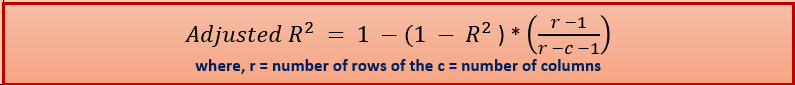

**Observations:**<br>
1. The Intercepts & the Co-efficients learned/ returned by model built using statsmodels are consistent with he outputs obtained by the model built using sklearn !!<br> 

**Interpretations of the various Outputs from the Statistical Summary above:**<br> 
**1. R-Squared & Adjuted_R-Squared :** <br> 
**2. F_Statistic :**<br> 
**3. Overall Model Probability :**<br> 
**4. Intercept & CoEfficients :**<already interpreted in previous section><br>
**5. Standard Error :**<br>
**5. t :**<br>
**5. P > |t| :**<br>    

**for detailed interpretations and inferences of the above - refer the Report**

#### RMSE : Train Set

In [109]:
# First, we will compute the MSE
MSE_test = np.mean(
    (sm_LRM_1.predict(train_set.drop('price', axis=1)) - train_set['price'])**2)
MSE_test

np.float64(1034550.3453072659)

In [110]:
RMSE_test = np.sqrt(MSE_test)
RMSE_test

np.float64(1017.1284802360349)

#### Residual : Train Set

In [111]:
RMSE_test = np.sqrt(sm_LRM_1.mse_resid)
RMSE_test

np.float64(1017.4056043128431)

**Predict on the Test dataset based on the learning from Train dataset**

In [112]:
y_predicted = sm_LRM_1.predict(test_set)
y_predicted.shape
y_predicted.head()
y_predicted.tail()

(7869,)

16889    -608.684831
2141     2034.116774
21004    2265.607093
24030    1412.724818
7862     1037.403145
dtype: float64

17552      177.296271
12513      709.926907
19999     2266.372545
13621     3552.025298
22659    12518.361197
dtype: float64

#### Compare the Targets (predicted vs actual)

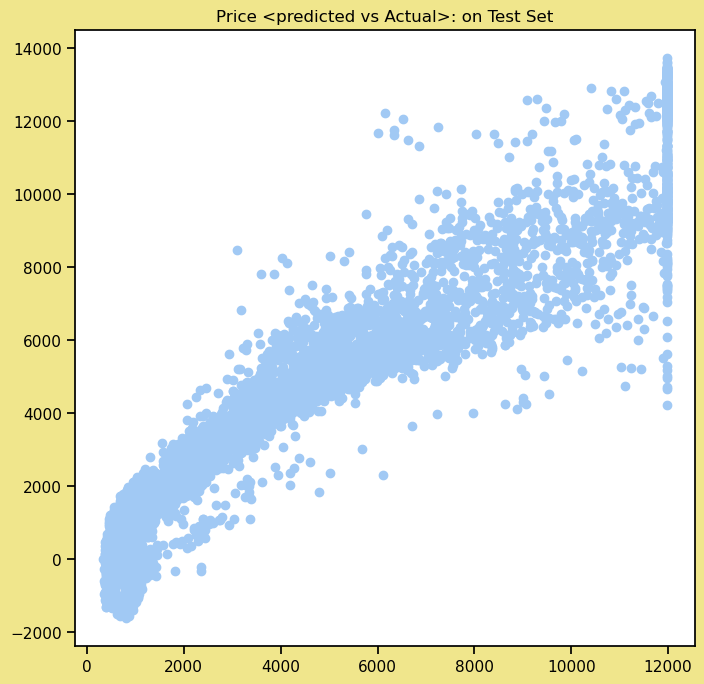

In [113]:
plt.figure(figsize=(8,8), facecolor= 'khaki');
sns.set_palette('pastel');
sns.set_context('notebook');

plt.scatter(y_test, y_predicted);

plt.title("Price <predicted vs Actual>: on Test Set")
plt.show();

## Conclusions

<pre style="font-size:14px; line-height:1.6; background:#f5f5f5; padding:12px; border-radius:6px;">
<strong>Final Regression Equation</strong>

price =
    Intercept
  + (coefficient of carat   * carat)
  + (coefficient of cut     * cut)
  + (coefficient of color   * color)
  + (coefficient of clarity * clarity)
  + (coefficient of depth   * depth)
  + (coefficient of table   * table)
  + (coefficient of length  * length)
  + (coefficient of width   * width)
  + (coefficient of height  * height)
</pre>

In [114]:
np.round(sm_LRM_1.params, 2)

Intercept    1395.33
carat        9155.57
cut           364.22
color        -543.10
clarity       614.68
depth           4.60
table         -51.48
length      -1598.53
width        1727.33
height      -1244.97
dtype: float64

<pre style="font-size:14px; line-height:1.6; background:#f5f5f5; padding:12px; border-radius:6px;">
<strong>Final Regression Equation</strong>

price =
    1395.33
  + 9155.57  * carat
  +  364.22  * cut
  -  543.10  * color
  +  614.68  * clarity
  +    4.60  * depth
  -   51.48  * table
  - 1598.53  * length
  + 1727.33  * width
  - 1244.97  * height
</pre>


# END OF THE NOTEBOOK